In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv(r'Y:\Self\College\S8\AI Nose\Combined Data\combined data 5.csv')

In [3]:
data.tail()

,voc1,no2,eth,co,tag
6600,1.57,2.49,1.36,1.87,tea
6601,1.57,2.49,1.36,1.87,tea
6602,1.57,2.49,1.36,1.87,tea
6603,1.57,2.49,1.37,1.88,tea
6604,1.57,2.49,1.37,1.87,tea


In [4]:
data

,voc1,no2,eth,co,tag
0,0.43,0.70,0.23,0.83,background
1,0.43,0.70,0.23,0.83,background
2,0.43,0.69,0.23,0.83,background
3,0.43,0.69,0.23,0.83,background
4,0.43,0.69,0.23,0.83,background
...,...,...,...,...,...
6600,1.57,2.49,1.36,1.87,tea
6601,1.57,2.49,1.36,1.87,tea
6602,1.57,2.49,1.36,1.87,tea
6603,1.57,2.49,1.37,1.88,tea


In [5]:
data.columns

Index(['voc1', 'no2', 'eth', 'co', 'tag'], dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# X contains the features and y contains the target variable
X = data[['voc1', 'no2', 'eth', 'co']]
y = data['tag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the SVC model
model_svc = SVC(kernel='poly', C=1, decision_function_shape='ovr')  # Using linear kernel, you can experiment with other kernels too
model_svc.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = model_svc.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[259   0   0   0   0   0]
 [  0 226   0   0   0   0]
 [  0   0 230   0   0   0]
 [  0   0   0 202   0   0]
 [  0   0   0   0 227   0]
 [  0   0   0   0   0 177]]

Classification Report:
              precision    recall  f1-score   support

  background       1.00      1.00      1.00       259
      coffee       1.00      1.00      1.00       226
      garlic       1.00      1.00      1.00       230
      ginger       1.00      1.00      1.00       202
      orange       1.00      1.00      1.00       227
         tea       1.00      1.00      1.00       177

    accuracy                           1.00      1321
   macro avg       1.00      1.00      1.00      1321
weighted avg       1.00      1.00      1.00      1321



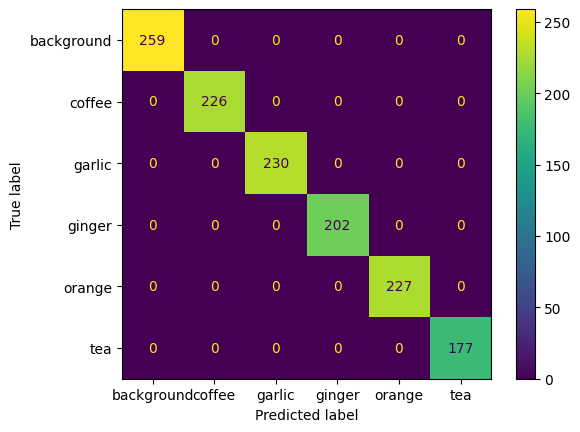

In [7]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_svc.classes_)
disp.plot()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# X contains the features and y contains the target variable
X = data[['voc1', 'no2', 'eth', 'co']]
y = data['tag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
model.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[259   0   0   0   0   0]
 [  0 226   0   0   0   0]
 [  0   0 230   0   0   0]
 [  0   0   0 202   0   0]
 [  0   0   0   0 227   0]
 [  0   0   0   0   0 177]]

Classification Report:
              precision    recall  f1-score   support

  background       1.00      1.00      1.00       259
      coffee       1.00      1.00      1.00       226
      garlic       1.00      1.00      1.00       230
      ginger       1.00      1.00      1.00       202
      orange       1.00      1.00      1.00       227
         tea       1.00      1.00      1.00       177

    accuracy                           1.00      1321
   macro avg       1.00      1.00      1.00      1321
weighted avg       1.00      1.00      1.00      1321



In [9]:
X, y = data[['voc1','no2','eth','co']], data['tag']

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import joblib
from joblib import dump, load

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_categorical = to_categorical(y, num_classes=6)
label_encoder_path = r"Y:\Self\College\S8\AI Nose\Combined Data\label_encoder2.pkl"
joblib.dump(label_encoder, label_encoder_path)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
scaler_path = (r'Y:\Self\College\S8\AI Nose\Combined Data\scaler2.pkl')
dump(scaler, scaler_path)

['Y:\\Self\\College\\S8\\AI Nose\\Combined Data\\scaler2.pkl']

In [10]:
X_train.shape

(5284, 4)

In [11]:
y_train.shape

(5284, 6)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5, 
    monitor='val_loss', 
    restore_best_weights=True,  
    verbose=1  
)

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/30
185/185 [==============================] - 2s 4ms/step - loss: 1.4454 - accuracy: 0.3386 - val_loss: 1.2200 - val_accuracy: 0.4792
Epoch 2/30
185/185 [==============================] - 1s 3ms/step - loss: 0.9988 - accuracy: 0.5506 - val_loss: 0.8420 - val_accuracy: 0.5889
Epoch 3/30
185/185 [==============================] - 1s 3ms/step - loss: 0.6735 - accuracy: 0.6933 - val_loss: 0.5306 - val_accuracy: 0.7806
Epoch 4/30
185/185 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.9562 - val_loss: 0.3128 - val_accuracy: 0.9805
Epoch 5/30
185/185 [==============================] - 1s 3ms/step - loss: 0.2392 - accuracy: 0.9849 - val_loss: 0.1765 - val_accuracy: 0.9798
Epoch 6/30
185/185 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9878 - val_loss: 0.1044 - val_accuracy: 0.9830
Epoch 7/30
185/185 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9927 - val_loss: 0.0716 - val_accuracy: 0.9849
Epoch 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 6)                 30        
                                                                 
Total params: 178 (712.00 Byte)
Trainable params: 178 (712.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

42/42 [==============================] - 0s 2ms/step - loss: 4.4079e-04 - accuracy: 1.0000
Test Loss: 0.0004, Test Accuracy: 1.0000


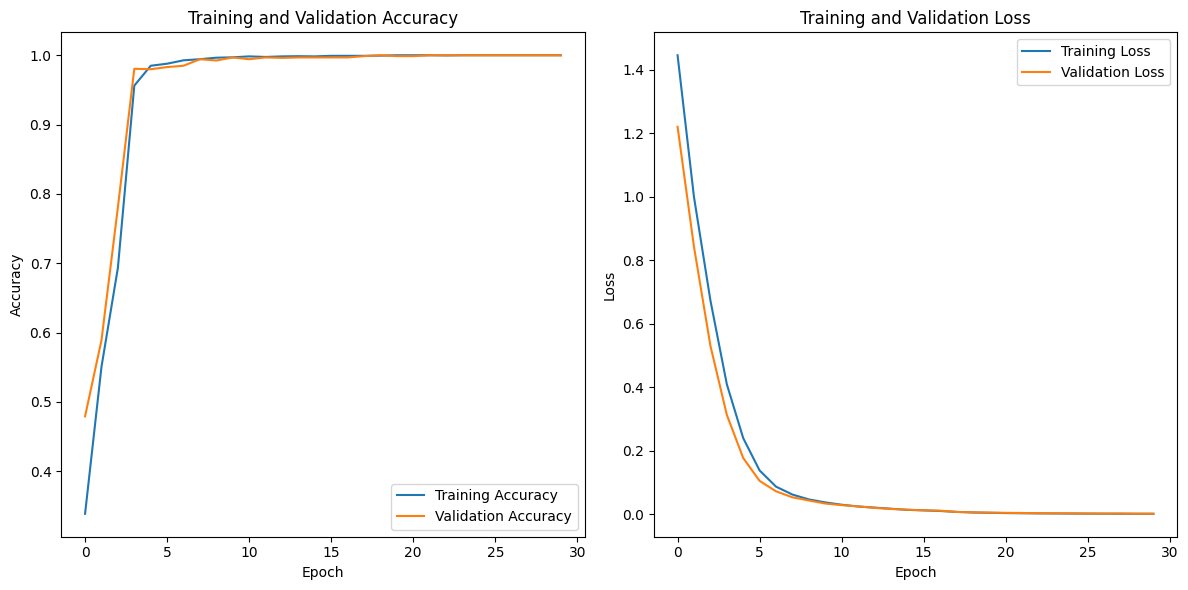

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
X, y = data[['voc1','no2','eth','co']], data['tag']

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import joblib
from joblib import dump, load

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_categorical = to_categorical(y, num_classes=6)
label_encoder_path = r"Y:\Self\College\S8\AI Nose\Combined Data\label_encoder2.pkl"
joblib.dump(label_encoder, label_encoder_path)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
scaler_path = (r'Y:\Self\College\S8\AI Nose\Combined Data\scaler2.pkl')
dump(scaler, scaler_path)

['Y:\\Self\\College\\S8\\AI Nose\\Combined Data\\scaler2.pkl']

In [20]:
X_train.shape

(1604, 4)

In [21]:
y_train.shape

(1604, 6)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5, 
    monitor='val_loss', 
    restore_best_weights=True,  
    verbose=1  
)

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/30
57/57 [==============================] - 1s 7ms/step - loss: 1.7181 - accuracy: 0.4216 - val_loss: 1.6642 - val_accuracy: 0.4129
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 1.6115 - accuracy: 0.4412 - val_loss: 1.5477 - val_accuracy: 0.4481
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 1.4776 - accuracy: 0.6194 - val_loss: 1.3821 - val_accuracy: 0.7324
Epoch 4/30
57/57 [==============================] - 0s 4ms/step - loss: 1.2930 - accuracy: 0.7861 - val_loss: 1.1706 - val_accuracy: 0.8299
Epoch 5/30
57/57 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.8476 - val_loss: 0.9079 - val_accuracy: 0.8589
Epoch 6/30
57/57 [==============================] - 0s 4ms/step - loss: 0.7803 - accuracy: 0.8627 - val_loss: 0.6432 - val_accuracy: 0.8589
Epoch 7/30
57/57 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.8627 - val_loss: 0.4549 - val_accuracy: 0.8589
Epoch 8/30
57/57 [==

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 6)                 30        
                                                                 
Total params: 178 (712.00 Byte)
Trainable params: 178 (712.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9950
Test Loss: 0.0268, Test Accuracy: 0.9950


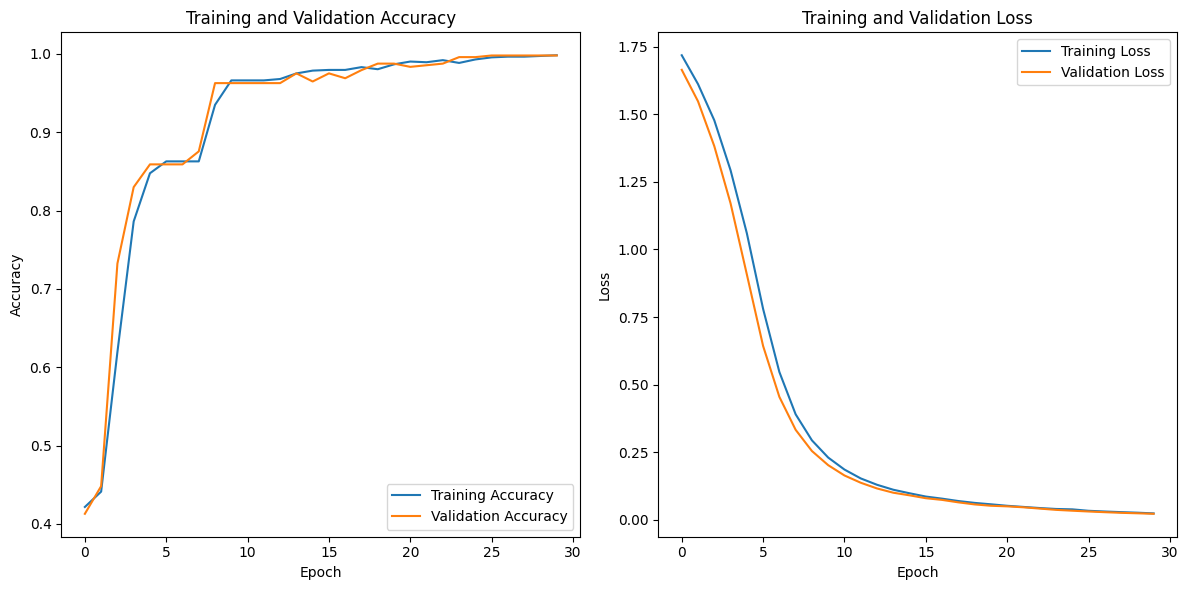

In [25]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
model.save(r"Y:\Self\College\S8\AI Nose\Combined Data\ann_model")

INFO:tensorflow:Assets written to: Y:\Self\College\S8\AI Nose\Combined Data\ann_model2\assets


INFO:tensorflow:Assets written to: Y:\Self\College\S8\AI Nose\Combined Data\ann_model2\assets


### Making a sample prediction

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

# Load the scaler from the specified path
scaler_path = r"Y:\Self\College\S8\AI Nose\Combined Data\scaler.pkl"
scaler = joblib.load(scaler_path)

model = load_model(r"Y:\Self\College\S8\AI Nose\Combined Data\ann_model")

label_encoder_path = r"Y:\Self\College\S8\AI Nose\Combined Data\label_encoder.pkl"
label_encoder = joblib.load(label_encoder_path)

inputs_features = np.array([[4.54,4.10,4.96,4.48]])

# Transform the input data using the loaded scaler
scaled_inputs_features = scaler.transform(inputs_features)

# Predict using the model
predictions_features = model.predict(scaled_inputs_features)

# Get the predicted class index (argmax)
predicted_class_index = np.argmax(predictions_features, axis=1)

# Inverse transform the predicted class index to the original class labels
decoded_labels_features = label_encoder.inverse_transform(predicted_class_index)

print("Predicted Labels:")
print(decoded_labels_features)

c:\Users\muham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 187ms/step
Predicted Labels:
['orange']


In [1]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load the scaler from the specified path
scaler_path = r"Y:\Self\College\S8\AI Nose\Combined Data\scaler.pkl"
scaler = joblib.load(scaler_path)

# Load the label encoder from the specified path
label_encoder_path = r"Y:\Self\College\S8\AI Nose\Combined Data\label_encoder.pkl"
label_encoder = joblib.load(label_encoder_path)

# Load the model
model_path = r"Y:\Self\College\S8\AI Nose\Combined Data\ann_model"
model = load_model(model_path)

def predict_class():
    try:
        # Get input features from the entry fields
        feature1 = float(entry_feature1.get())
        feature2 = float(entry_feature2.get())
        feature3 = float(entry_feature3.get())
        feature4 = float(entry_feature4.get())
        
        # Transform the input data using the loaded scaler
        scaled_input_features = scaler.transform([[feature1, feature2, feature3, feature4]])
        
        # Predict using the model
        predictions = model.predict(scaled_input_features)
        
        # Get the predicted class index (argmax)
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Inverse transform the predicted class index to the original class label
        predicted_class = label_encoder.inverse_transform(predicted_class_index)
        
        # Show the predicted class in a message box
        messagebox.showinfo("Prediction", f"The predicted class is: {predicted_class[0]}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Create the main window
root = tk.Tk()
root.title("AI Nose Prediction")

# Create labels and entry fields for input features
tk.Label(root, text="Feature 1:").grid(row=0, column=0)
entry_feature1 = tk.Entry(root)
entry_feature1.grid(row=0, column=1)

tk.Label(root, text="Feature 2:").grid(row=1, column=0)
entry_feature2 = tk.Entry(root)
entry_feature2.grid(row=1, column=1)

tk.Label(root, text="Feature 3:").grid(row=2, column=0)
entry_feature3 = tk.Entry(root)
entry_feature3.grid(row=2, column=1)

tk.Label(root, text="Feature 4:").grid(row=3, column=0)
entry_feature4 = tk.Entry(root)
entry_feature4.grid(row=3, column=1)

# Create a button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict_class)
predict_button.grid(row=4, column=0, columnspan=2, pady=10)

# Run the main event loop
root.mainloop()

ModuleNotFoundError: No module named 'dill'

In [11]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import threading
import time

# Load the scaler from the specified path
scaler_path = r"Y:\Self\College\S8\AI Nose\Combined Data\scaler.pkl"
scaler = joblib.load(scaler_path)

# Load the label encoder from the specified path
label_encoder_path = r"Y:\Self\College\S8\AI Nose\Combined Data\label_encoder.pkl"
label_encoder = joblib.load(label_encoder_path)

# Load the model
model_path = r"Y:\Self\College\S8\AI Nose\Combined Data\ann_model"
model = load_model(model_path)

# Global variables to store the input features
input_features = []

def start_prediction():
    global input_features
    input_features = []  # Reset input features
    
    # Update UI to show "Predicting..."
    prediction_label.config(text="Predicting...")
    root.update_idletasks()
    
    # Predict for 25 seconds
    start_time = time.time()
    while time.time() - start_time < 10:
        # Replace this with your code to read the sensor values
        # For this example, I'm generating random values
        feature1 = np.random.rand(5)
        feature2 = np.random.rand(5)
        feature3 = np.random.rand(5)
        feature4 = np.random.rand(5)
        
        # Add the features to the input list
        input_features.append([feature1, feature2, feature3, feature4])
        
        time.sleep(0.5)  # Simulating reading sensor values every 0.5 seconds
    
    # Predict after 25 seconds
    predict()

def predict():
    global input_features
    
    try:
        # Transform the input data using the loaded scaler
        scaled_input_features = scaler.transform(input_features)
        
        # Predict using the model
        predictions = model.predict(scaled_input_features)
        
        # Get the predicted class index (argmax)
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Inverse transform the predicted class index to the original class label
        predicted_class = label_encoder.inverse_transform(predicted_class_index)
        
        # Show the predicted class in a message box
        messagebox.showinfo("Prediction", f"The predicted odor is: {predicted_class[0]}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")
    finally:
        # Reset input features
        input_features = []
        prediction_label.config(text="Press 'Start Prediction' to begin")

# Create the main window
root = tk.Tk()
root.title("Real-time Odor Prediction")

# Create a label to show prediction status
prediction_label = tk.Label(root, text="Press 'Start Prediction' to begin")
prediction_label.pack(pady=10)

# Create a button to start prediction
start_button = ttk.Button(root, text="Start Prediction", command=start_prediction)
start_button.pack(pady=10)

# Run the main event loop
root.mainloop()


c:\Users\muham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
